In [1]:
import pandas as pd
import numpy as np
from sklearn import *

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

%matplotlib inline

/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/abulbasar/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be rem

In [2]:
df = pd.read_csv("/data/credit-default.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [4]:
target = "default"
y = np.where(df[target] == 2, 1, 0)
X = df.copy() # features ... label is not included
del X[target]
X = pd.get_dummies(X, drop_first=True) # handle catergorical variables ... one hot encoding

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y
                            , test_size = 0.3, random_state = 1)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

accuracy 0.7566666666666667 
precision 0.6 
recall 0.45348837209302323


(<matplotlib.figure.Figure at 0x10fb76f98>,
 <matplotlib.axes._subplots.AxesSubplot at 0x116d7b780>)

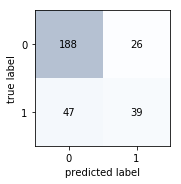

In [6]:
est =  linear_model.LogisticRegression()                                
est.fit(X_train, y_train)

y_train_pred = est.predict(X_train)
y_test_pred = est.predict(X_test)

print("accuracy", metrics.accuracy_score(y_test, y_test_pred),
"\nprecision", metrics.precision_score(y_test, y_test_pred),
"\nrecall", metrics.recall_score(y_test, y_test_pred))
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred))

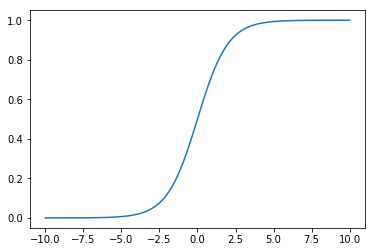

In [9]:
Z = np.linspace(-10, 10, 100)
A = 1/(1 + np.exp(-Z))
plt.plot(Z, A)

0.7566666666666667

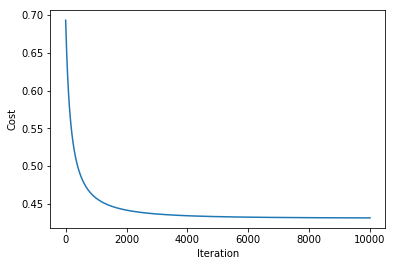

In [28]:
class MyLogisticRegression:
    
    
    def __init__(self, ):
        self.costs = []
        self.learning_rate = 0.01
        self.max_iter = 10000
    
    def fit(self, X, y):
        learning_rate = self.learning_rate
        y = y.reshape(-1, 1)
        m, n = X.shape # m: number of records, n: num of columns
        W = np.zeros((n, 1)) # theta values
        b = 0.0 # theta0
        
        for i in range(self.max_iter):
            Z = np.dot(X, W) + b
            y_hat = 1/(1+np.exp(-Z))

            loss = - (y * np.log(y_hat) + (1-y) * np.log(1 - y_hat))
            cost = np.sum(loss)/m
            self.costs.append(cost)

            error = (y_hat - y)

            dW = np.dot(X.T, error) / m 
            db = np.sum(error) / m 

            W = W - learning_rate * dW
            b = b - learning_rate * db
        self.W = W
        self.b = b
        
        #print(X.shape, y.shape, W.shape, Z.shape, y_hat.shape, loss.shape, dW.shape, db.shape)
    
    def predict(self, X):
        W = self.W
        b = self.b
        Z = np.dot(X, W) + b
        y_hat = 1/(1+np.exp(-Z))
        return y_hat
    
    def predict_class(self, X):
        y_hat = self.predict(X)
        return np.where(y_hat>0.5, 1, 0)
    
est = MyLogisticRegression()
est.fit(X_train, y_train)
pd.Series(est.costs).plot()
plt.xlabel("Iteration")
plt.ylabel("Cost")
y_test_pred = est.predict_class(X_test)
metrics.accuracy_score(y_test, y_test_pred)